In [1]:
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import functools, inspect, sys
import seaborn as sns

In [2]:
tfd = tfp.distributions
distribution_class = tfp.distributions.Distribution
distributions = [name for name, obj in inspect.getmembers(tfd)
                 if inspect.isclass(obj) and issubclass(obj, distribution_class)]
print(distributions)

2023-09-06 19:01:25.941373: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 19:01:26.022213: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-06 19:01:26.023153: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-06 19:01:27.744645: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


['AutoCompositeTensorDistribution', 'Autoregressive', 'BatchBroadcast', 'BatchConcat', 'BatchReshape', 'Bates', 'Bernoulli', 'Beta', 'BetaBinomial', 'BetaQuotient', 'Binomial', 'Blockwise', 'Categorical', 'Cauchy', 'Chi', 'Chi2', 'CholeskyLKJ', 'ContinuousBernoulli', 'DeterminantalPointProcess', 'Deterministic', 'Dirichlet', 'DirichletMultinomial', 'Distribution', 'DoublesidedMaxwell', 'Empirical', 'ExpGamma', 'ExpInverseGamma', 'ExpRelaxedOneHotCategorical', 'Exponential', 'ExponentiallyModifiedGaussian', 'FiniteDiscrete', 'Gamma', 'GammaGamma', 'GaussianProcess', 'GaussianProcessRegressionModel', 'GeneralizedExtremeValue', 'GeneralizedNormal', 'GeneralizedPareto', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'HalfStudentT', 'HiddenMarkovModel', 'Horseshoe', 'Independent', 'Inflated', 'InverseGamma', 'InverseGaussian', 'JohnsonSU', 'JointDistribution', 'JointDistributionCoroutine', 'JointDistributionCoroutineAutoBatched', 'JointDistributionNamed', 'JointDistributionNamedAutoBatc

In [3]:
normal = tfd.Normal(loc=0., scale=1.)

2023-09-06 19:01:29.545253: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
def plot_normal(N):
    samples = normal.sample(N)
    sns.displot(samples, kde=True)
    plt.title(f"Normal Distribution with zero mean, and 1 std. dev {N} samples")
    plt.show()

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


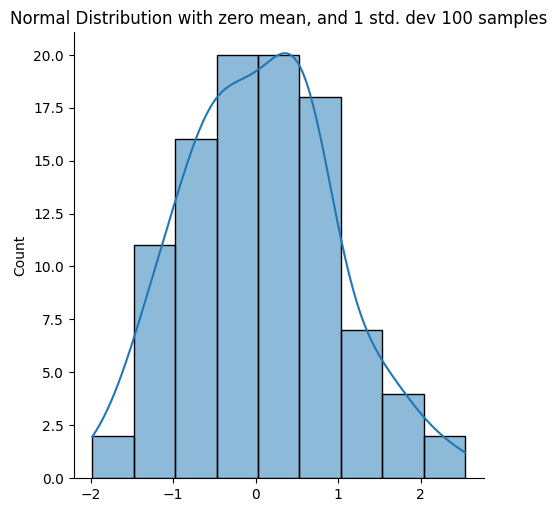

In [5]:
plot_normal(100)

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


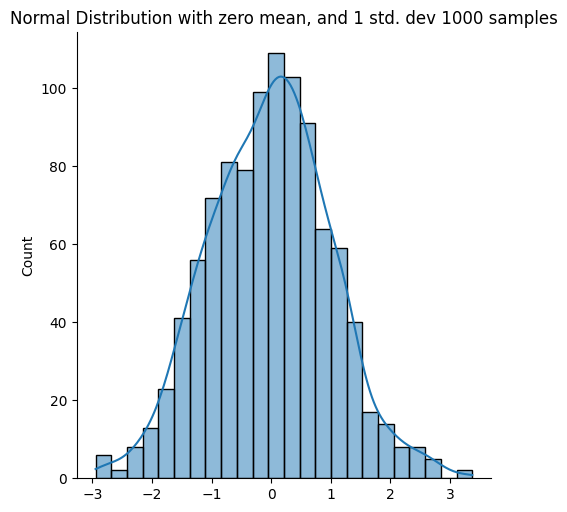

In [6]:
plot_normal(1000)

/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


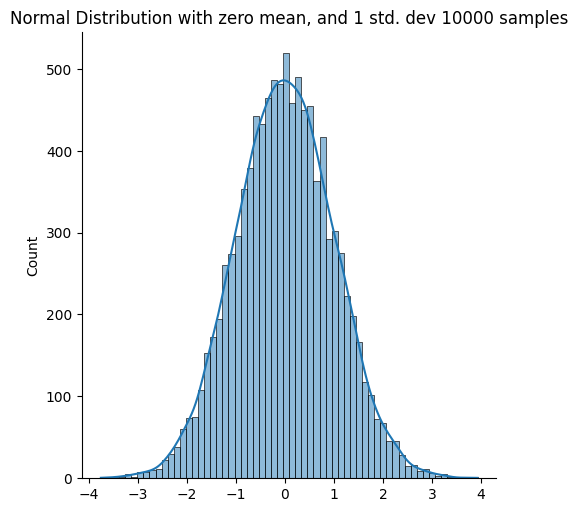

In [7]:
plot_normal(10000)

# TensorFlow Probability distributions

In [8]:
normal = tfd.Normal(loc=0., scale=1.)
print(normal)

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)


In [9]:
normal.sample()

<tf.Tensor: shape=(), dtype=float32, numpy=0.23605663>

In [10]:
normal.prob(0.1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.39695257>

In [11]:
normal_2 = tfd.Normal(loc=[0., 0.], scale=[1., 3.])
print(normal_2)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


In [12]:
normal_2.sample()

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 1.1769307, -1.7740906], dtype=float32)>

In [13]:
normal_2.prob(0.9)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.26608527, 0.12712924], dtype=float32)>

In [14]:
# create multivariate dependent 2D normal distribution
normal_3 = tfd.MultivariateNormalDiag(loc=[[1.0, 0.3]])
print(normal_3)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[1], event_shape=[2], dtype=float32)


In [15]:
normal_3.sample()

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[2.0842013, 0.7569421]], dtype=float32)>

In [16]:
normal_3.prob(0.9)

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.13227436], dtype=float32)>